## Eigenvalue problem and solvig Schrodinger equation in 2D


In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
start_x = start_y = -4
dx = dy = 0.2
stop_x = stop_y = 4
x = np.arange(start_x,stop_x,dx)
y = np.arange(start_y,stop_y,dy)
nx = np.size(x)
ny = np.size(y)
omega = 1
mass = 1
hbar = 1

Define first ordinary and first partial derivative oprator : 

In [26]:
ord_D1_x = (-np.diag(np.ones(nx),0) + np.diag(np.ones(nx-1),1))/dx
ord_D1_y = (-np.diag(np.ones(ny),0) + np.diag(np.ones(ny-1),1))/dy
ord_D1_x[nx-1,0] = 1/dx
ord_D1_y[ny-1,0] = 1/dy
iden_x = np.eye(nx)
iden_y = np.eye(ny)
par_D1_x = np.kron(ord_D1_x,iden_y)
par_D1_y = np.kron(iden_x,ord_D1_y)

Define momentum operators : 

In [27]:
P1_x = -1j * hbar * par_D1_x
P1_y = -1j * hbar * par_D1_y
P2_x = (np.matmul(P1_x,P1_x.conj().T)+np.matmul(P1_x.conj().T,P1_x))/2
P2_y = (np.matmul(P1_y,P1_y.conj().T) + np.matmul(P1_y.conj().T,P1_y))/2

Define potential operators : 

In [28]:
diag_x = np.kron(np.diag(x),iden_y)
diag_y = np.kron(iden_x,np.diag(y))
diag_Vxy = 0.5 * mass * omega**2 * (diag_x**2+diag_y**2)

Define Hamiltonian operator and solve eigen value problem : 

In [30]:
H = P2_x/2*mass + P2_y/2*mass + diag_Vxy
eigenvalues , eigenvectors = np.linalg.eigh(H)

Plot potential function : 

<IPython.core.display.Javascript object>


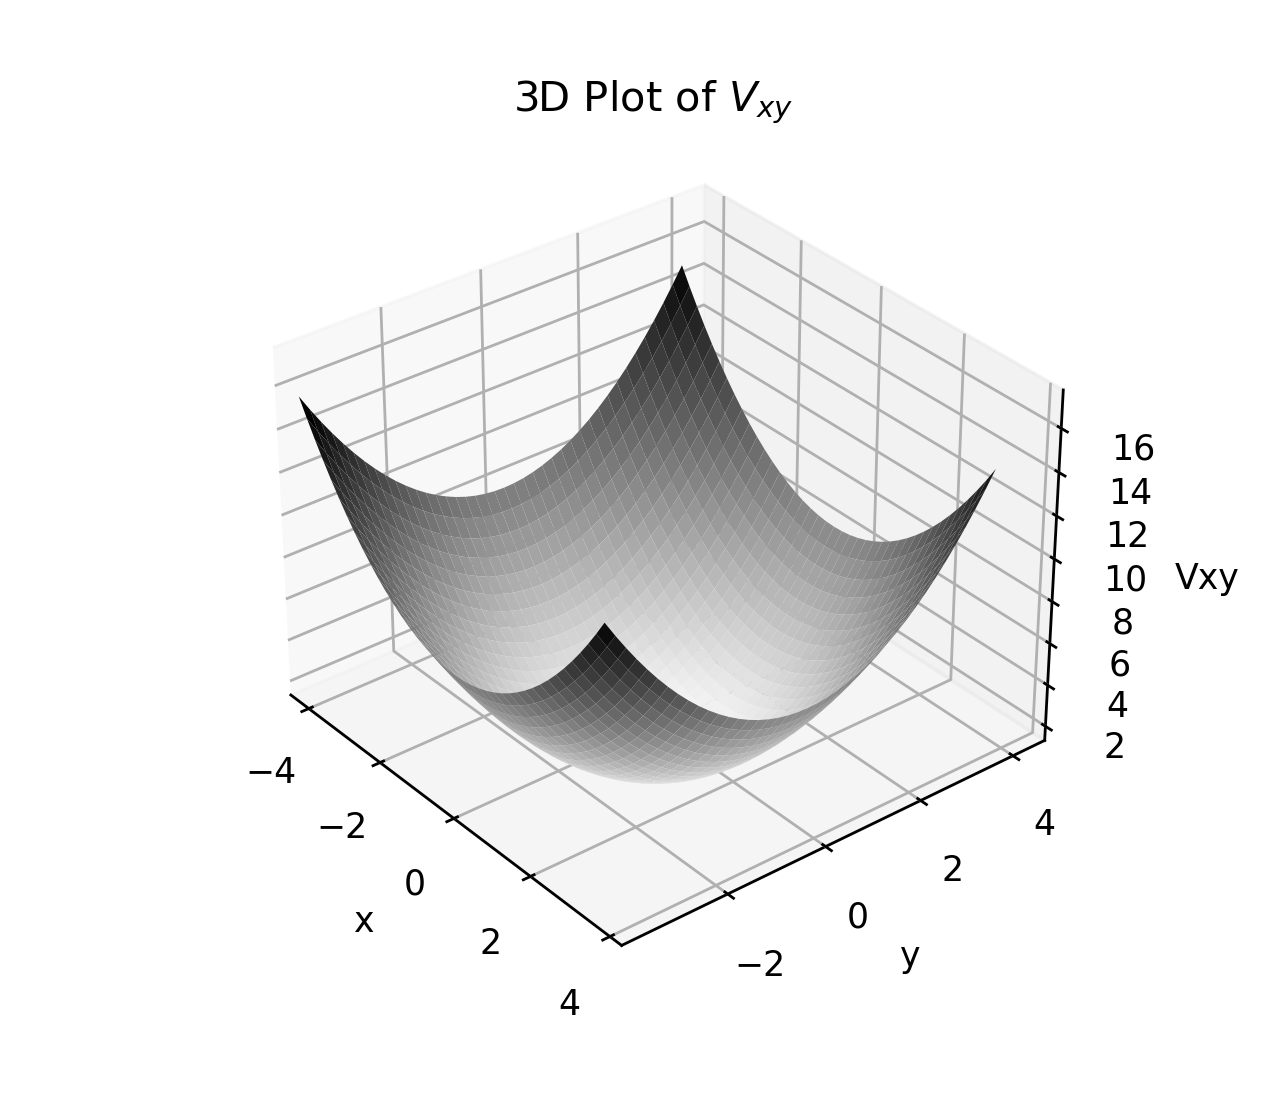

Text(0.5, 0, 'Vxy')

In [73]:
Vxy = np.reshape(np.diag(diag_Vxy),(ny,nx))
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, Vxy ,cmap='binary')
ax.set_title('3D Plot of $V_{xy}$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Vxy')

Plot ground state energy and wave function :

<IPython.core.display.Javascript object>


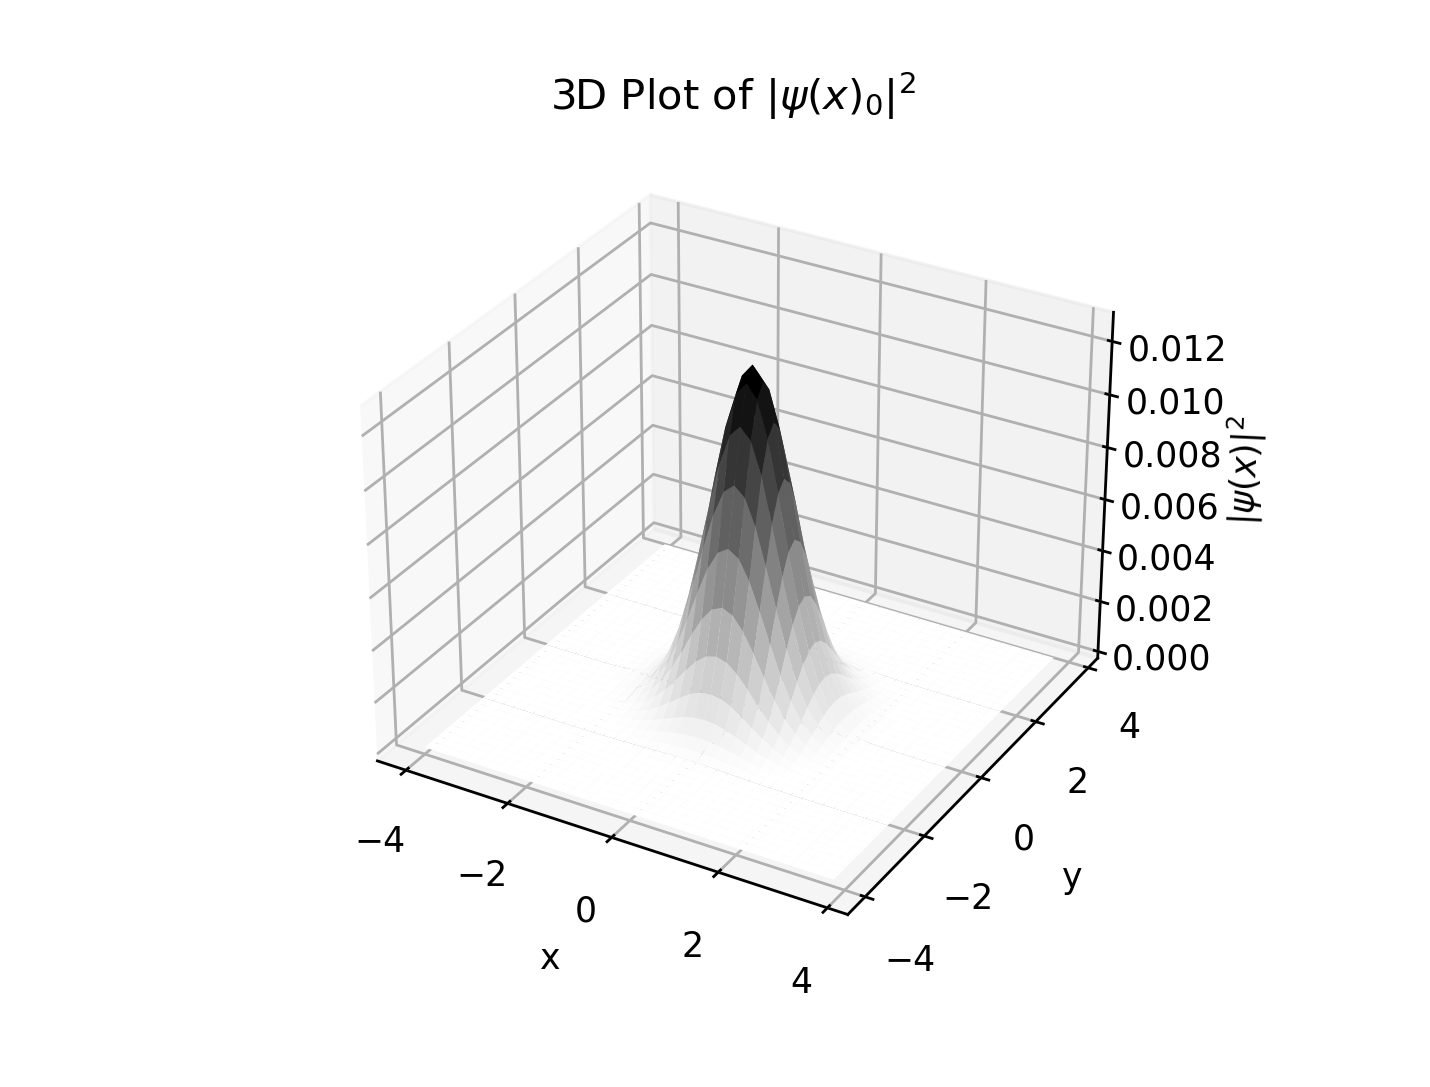

Text(0.5, 0, '$|\\psi(x)|^2$')

In [83]:
E0 = eigenvalues[0]
wavefunction0 = eigenvectors[:,0]
wavefunction0 = np.reshape(wavefunction0,(ny,nx))
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, np.abs(wavefunction0)**2 ,cmap='binary')
ax.set_title('3D Plot of $|\psi(x)_0|^2$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$|\psi(x)|^2$')

Plot first excited energy and wave function : 

<IPython.core.display.Javascript object>


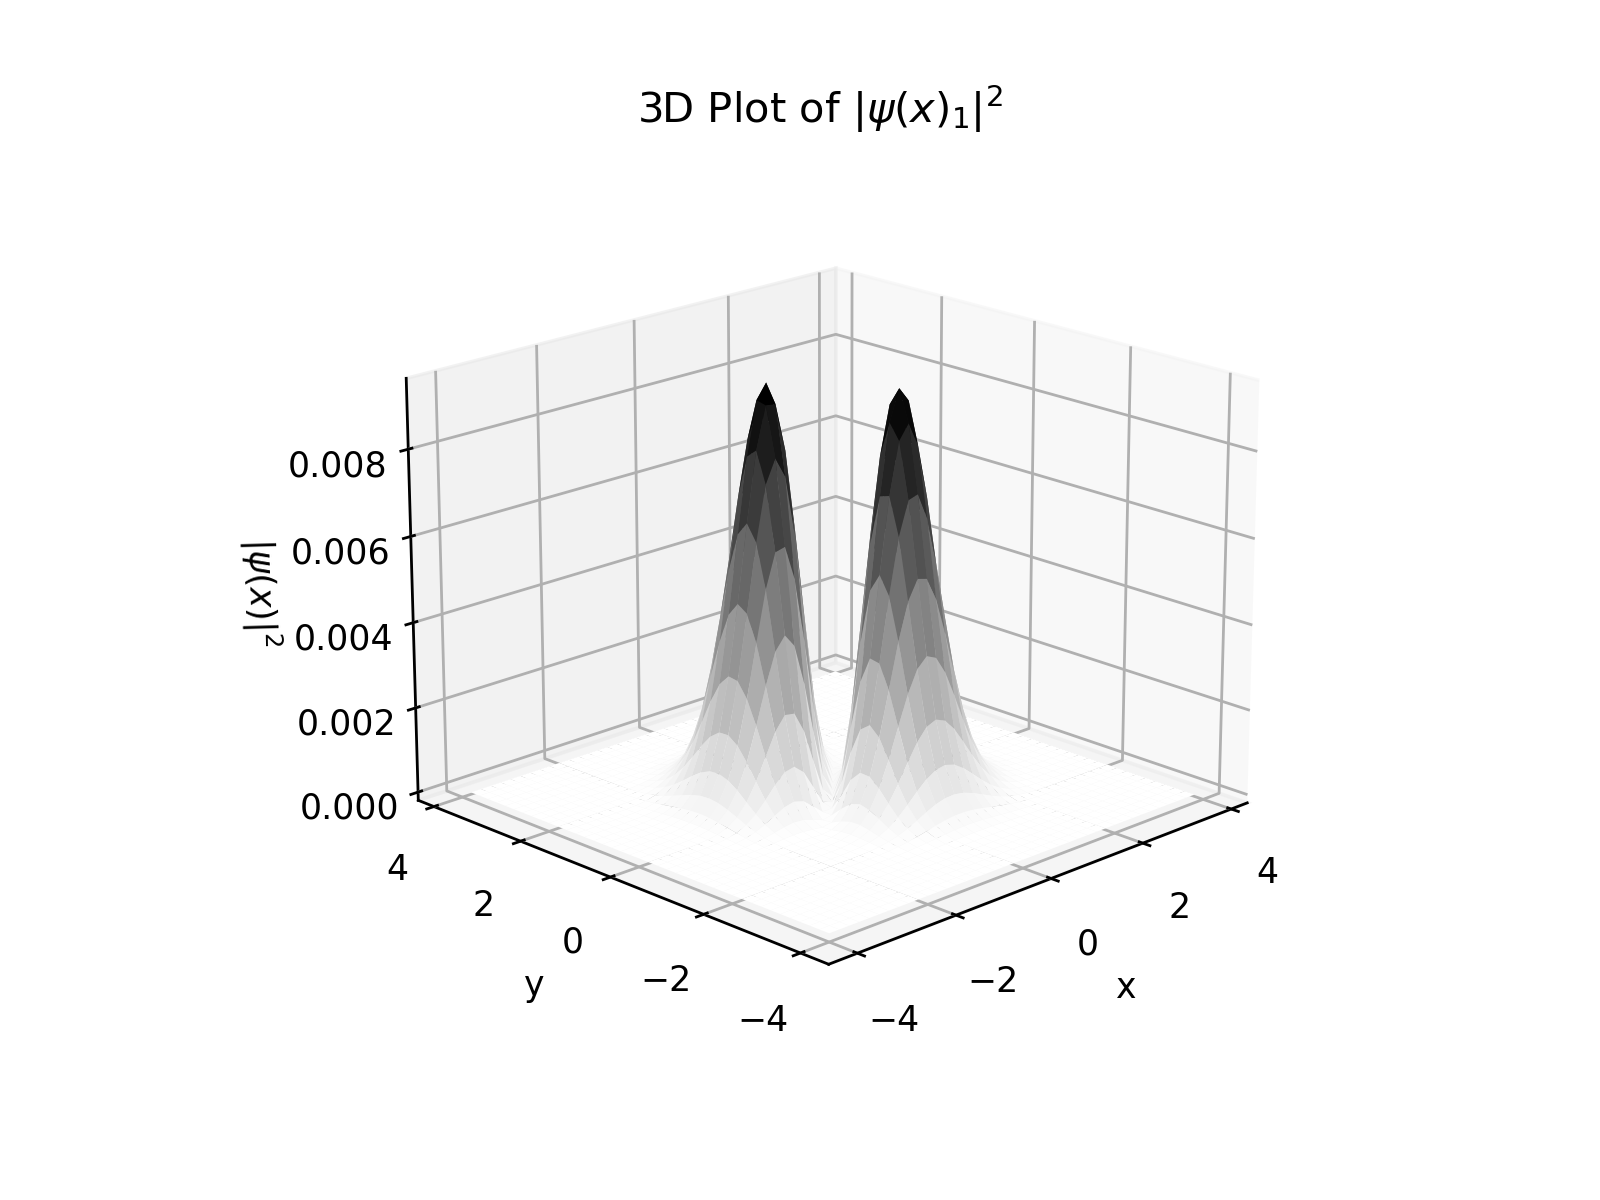

Text(0.5, 0, '$|\\psi(x)|^2$')

In [94]:
E1 = eigenvalues[1]
wavefunction1 = eigenvectors[:,1]
wavefunction1 = np.reshape(wavefunction1,(ny,nx))
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, np.abs(wavefunction1)**2 ,cmap='binary')
ax.set_title('3D Plot of $|\psi(x)_1|^2$')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$|\psi(x)|^2$')

Plot energy eigenvalues (theory: $E(n) = (nx+ny+1) \hbar \omega$ and  $n_x,n_y=0,1,2,...$)

<IPython.core.display.Javascript object>


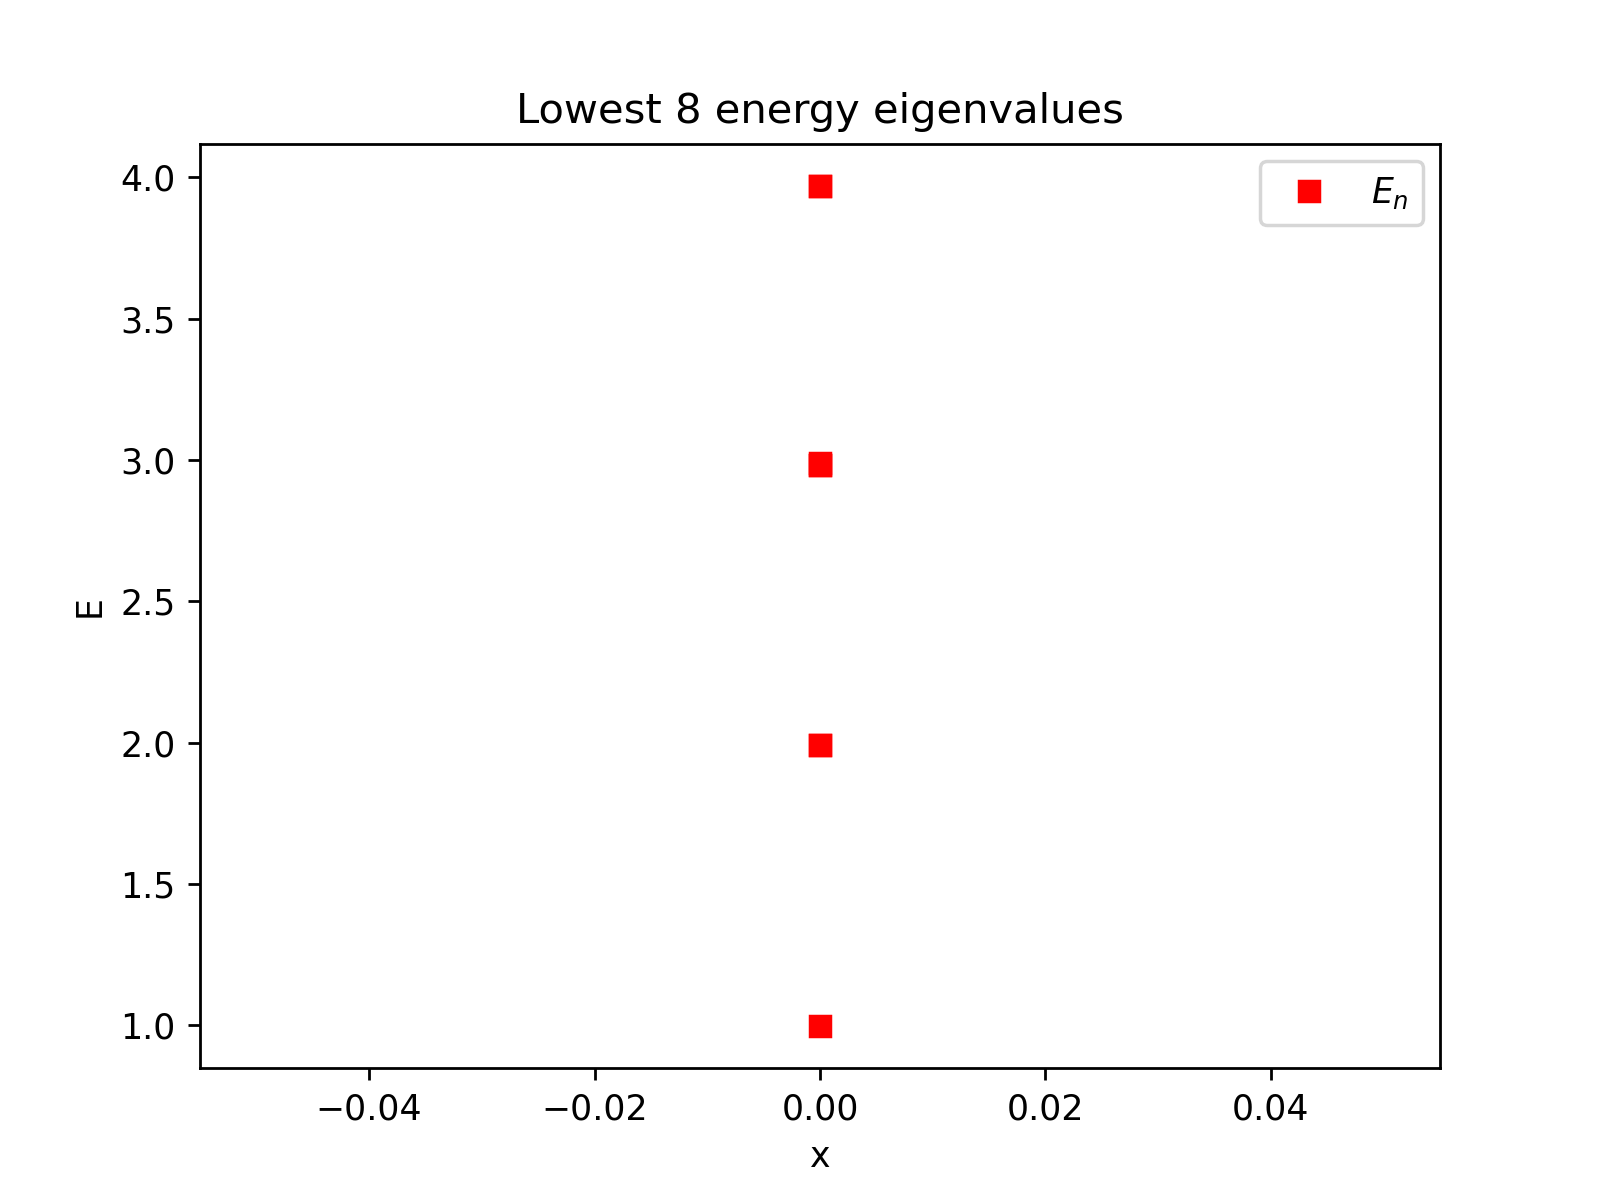

In [99]:
En = 8
z = np.zeros(En)
first_nE_eigenvalues = eigenvalues[0:En] # + 0.1*np.random.rand(En)
plt.plot(z, first_nE_eigenvalues, 'rs' , label='$E_n$')
plt.title('Lowest 8 energy eigenvalues')
plt.xlabel('x')
plt.ylabel('E')
plt.legend()
plt.show()